
## IV-Thresholding and edge detection

**Objectives:**  
* Implement the Isodata global thresholding method to binarize a gray_scale image.  
* Compare between different edge detection techniques.

In [103]:
# import all packages that will be used in Assignment IV
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import signal
%matplotlib inline

### Assignment IV.1: Threshold selection

In this assignment we will implement the automatic global threshold selection (Isodata thresholding). We will compare the quality of that technique when applying it globally on the input image, and when applying it locally to smaller paths of the image.

#### A.

Read the image file 'data/bird.png', convert into gray_scale if needed and view the image.

**Answer:**  

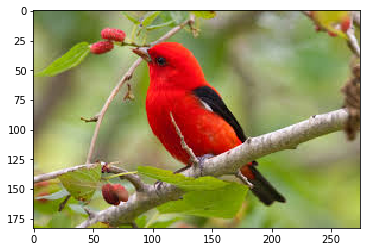

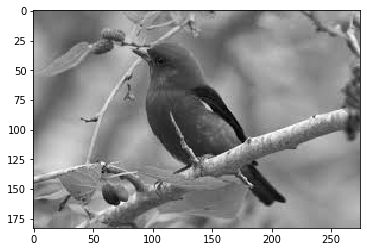

In [149]:
bird_bgr = cv2.imread('data/bird.png', cv2.IMREAD_COLOR)
bird_rgb = cv2.cvtColor(bird_bgr, cv2.COLOR_BGR2RGB)
bird_gray = cv2.cvtColor(bird_bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(bird_rgb)
plt.show()
plt.imshow(bird_gray, cmap='gray')
plt.show()

#### B.

Implement the Isodata thresholding technique from the slides. Use that to convert the gray_scale image to binary.

*Hint:* Write a function **Isodata(img)** to return the global threshold.

**Answer:**  

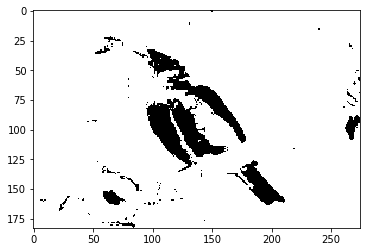

In [148]:
def isodata(img):
    e = 0.2
    hist,bins = np.histogram(img.ravel(),256,[0,256])
    t = (1 + 255)/2
    if(img.shape[0] > 0 and img.shape[1]>0):

        gmin = np.amin(img)
        gmax = np.amax(img)
        i = gmin+1
        minimum_e = 999

        while(True):
            nominator = 0
            denominator = 0
            for j in range(gmin, i):
                nominator += j*hist[j]
                denominator += hist[j]
            if(denominator != 0):
                m1= nominator/denominator
            else:
                m1 = 0
            nominator = 0
            denominator = 0
            for j in range(i, gmax+1):
                nominator += j*hist[j]
                denominator += hist[j]
            if(denominator != 0):
                m2= nominator/denominator
            else:
                m2 = 0

            new_t = (m1+m2)/2
            i+=1

            difference = abs(t-new_t)
            if(difference > e):
                t = new_t
            else:
                new_t = t
                break
            if(i==gmax+1):
                break
    return t

ret,thresh1 = cv2.threshold(bird_gray ,isodata(bird_gray),255,cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap='gray')

#### C.

Instead of finding a global threshold for the input image, we will apply the isodata technique on a smaller part (ex., window of size 5\*5) of the input image and use that threshold locally to binarize that part.  
Try dividing the input image using different window sizes, choose the size that gives the best binarization (where the background is zeros and the object is only remaining as 255s) different.

*Hint:* Write a funtion to implement this. Use function **Isodata(img)** that you implemented before.

**Answer:**  

(183, 275)


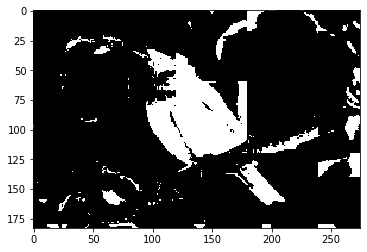

In [174]:
print(bird_gray.shape)
def window_isodata(img, windowsize):
    width = img.shape[1]
    height = img.shape[0]
    output = np.zeros(img.shape)
    for i in range(0, height, windowsize):
        for j in range(0, width, windowsize):
            segment = img[i:i+windowsize,j:j+windowsize]
            ret,binary = cv2.threshold(segment ,isodata(segment),255,cv2.THRESH_BINARY)
            output[i:i+windowsize,j:j+windowsize] = binary
            
    return output

plt.imshow(window_isodata(bird_gray, 60), cmap='binary')

### Assignment IV.2: Edge detection

In this assignment we will experiment different techniques to approximate taking the image derivative to find edges in different direction, we will also see how to find the magnitude and direction of the edges detected in an image.

#### A.

Read the image file 'data/bird.png', convert into gray_scale if needed and view the image.

**Answer:**  

In [ ]:
# type your code here

#### B.

Apply a smoothing gaussian filter on the gray_scale image using the function **cv2.GaussianBlur(img,(kernel.height, kernel.width),cv2.BORDER_DEFAULT)** and view the output image.

**Answer:**  

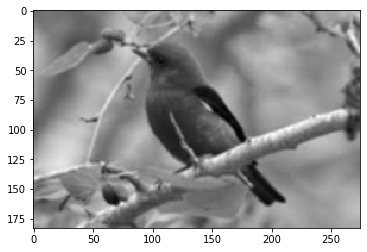

In [177]:
bird_smooth = cv2.GaussianBlur(bird_gray, (3,3), cv2.BORDER_DEFAULT)
plt.imshow(bird_smooth, cmap='gray')
plt.show()

#### C.

One of the first edge detection algorithms is the Sobel Edge Detector. The operator uses two 3\*3 kernels which are convolved with the original image to calculate approximations of the derivatives- one for horizontal changes, and one for vertical. If we define **A** as the source image, and **Gx** and **Gy** are two images which at each point contain the vertical and horizontal derivative approximations respectively, the computations are as follows:  
$$Gx = \left[ \begin{matrix} +1 & 0 & -1 \\ +2 & 0 & -2 \\ +1 & 0 & -1 \end{matrix} \right] * A$$ and $$Gy = \left[ \begin{matrix} +1 & +2 & +1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{matrix} \right] * A$$  
Implement and apply the sobel edge detector to find horizontal and vertical edges and view them.

*Hint:*  
1. **signal.convolve2d(A,kernel)**
2. Use the smoothed image.

**Answer:**  

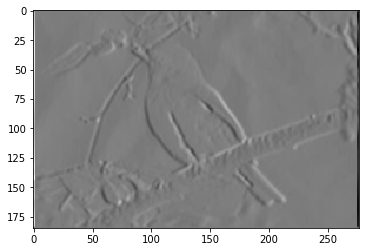

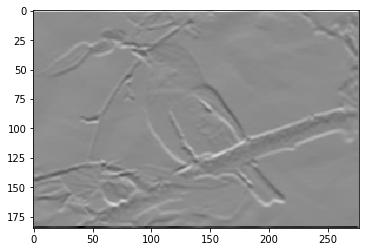

In [185]:
Hx = [[1, 0, -1], [2, 0, -2], [1, 0, -1]]
Hy = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]
Gx = signal.convolve2d(bird_smooth, Hx)
Gy = signal.convolve2d(bird_smooth, Hy)
plt.imshow(Gx, cmap='gray')
plt.show()
plt.imshow(Gy, cmap='gray')
plt.show()

Explain why the designed filter have these values.

**Answer:**  

#### D.

The magnitude of an edge detemines how strong an edge is. The resulting gradient approximations can be combined to give the gradient magnitude, using:  
$$G = \sqrt{G_x^2+G_y^2}$$
Compute the G (gradient magnitude) matrix and view it.

**Answer:**  

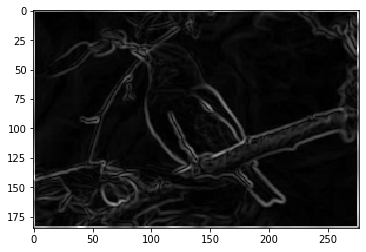

In [187]:
G = np.sqrt(np.power(Gx, 2) + np.power(Gy, 2))
plt.imshow(G, cmap='gray')
plt.show()

Choose a threshold on the magnitude to show the strong edges and define what is a strong edge in your opinion in that case.

*Hint:* Before selecting threshold, normalize **G** first and make **G** range from 0 to 255 and the type of **G** should be **np.uint8**.

**Answer:**  

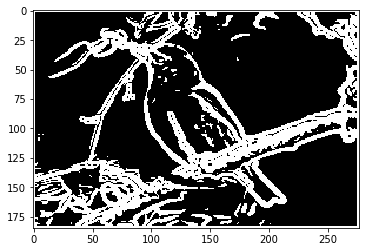

In [209]:
G_norm = cv2.normalize(G, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
G_norm = np.asarray(G_norm, dtype= np.uint8)
ret,G_binary = cv2.threshold(G_norm ,15,255,cv2.THRESH_BINARY)
plt.imshow(G_binary, cmap='gray')


#### E.

The orientation or direction of each edge can be calculated using:  
$$\theta = atan(\frac{G_y}{G_x})$$  
Compute the $\theta$ (orientation) matrix.

**Answer:**  

C:\Users\vilau\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Users\vilau\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Users\vilau\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arctan
  """Entry point for launching an IPython kernel.


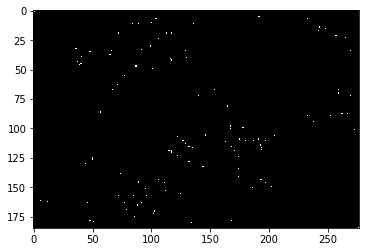

C:\Users\vilau\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
C:\Users\vilau\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.


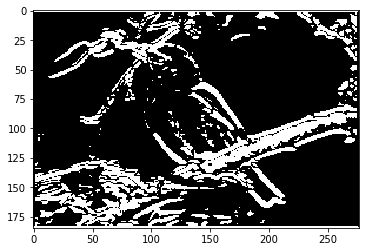

In [214]:
O = np.arctan(Gy/Gx)
G_45 = np.zeros(G.shape)
G_45[np.where(O == np.pi/4)] = G_binary[np.where(O == np.pi/4)]
G_45[np.where(O == -np.pi/4)] = G_binary[np.where(O == -np.pi/4)]

plt.imshow(G_45, cmap='gray')
plt.show()
G_30290 = np.zeros(G.shape)
G_30290[np.where(O > np.pi/6)] = G_binary[np.where(O > np.pi/6)]
G_30290[np.where(O < -np.pi/6)] = G_binary[np.where(O < -np.pi/6)]
plt.imshow(G_30290, cmap='gray')
plt.show()


Using the orientation of each edge, show only edges equal to 45-degree angle. On a different figure, show edges with orientations in the range from 30 degrees to 90 degrees. 

**Answer:**  

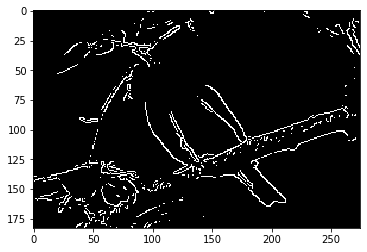

In [217]:
canny = cv2.Canny(bird_gray, 255, 255)
plt.imshow(canny, cmap='gray')

#### F.

There are many edge detection techniques that are already built in OpenCV package. One function for edge detection is **cv2.Canny()**. Use this method and at least one other method filtering image with different approximations (two matrix to compute **Gx** and **Gy**) to show the output of each and compare the output with the sobel output. Which is better and why?

**Answer:**  

In [ ]:
# type your code here

Explain (ex.pseudo-code) one of the the two methods in part F.

**Answer:**  